下边写的是我自己的研究和感受，不用看的

![title](../photo/HW3_Proble4.png)<br>
The image we need to deal with

The level of difficulty is getting harder It feels like I jumped suddenly, but it's fun
The core of what was covered in this chapter was morphology. In the past, I tried object detection or edge detection using yolo
Youngo, who uses Digital Image Processing without learning, is half-baked

The core of morphology is binary processing, kernel, padding, erosion, and dilatation.<br>
To summarize the core of the morphology, this is it.<br>
1. Binaryize the image.<BR>
2. Pad the image.<br>
3. Decide the size of the anchor box that I want.<br>
4. I get the image I want through erosion and dilation.<br>

Wow, I can understand the correlation between anchor boxes and padding that I didn't understand while studying yolo.(Of course, there is a lot of knowledge to know, such as batch size, activation function, and CNN.))<br>
Anyway, if you think of the image as a matrix structure, you can extract them in the form of a regular array, and the mathematical expressions of this as a set are erosions and dilations.<br>
![title](../photo/Erosion_formula.png)<br>
fig1. definition of erosion<br>

The following is a mathematical formula for erosion, and to explain by solving the formula, it means that the erosion of A by B is the set of all points z in A that are shifted by z.<br>
Simply put, when A is an image and B is an anchor, it is a set of image pixels fully contained in an anchor.<br>

![title](../photo/dilation_formula.png)<br>
fig2. definition of dilation<br>

The following is a mathematical formula for expansion, and to explain by solving the formula, it is based on reflecting B to its origin and then moving it by z.<br>
The expansion of A by B is then a set of all shifts z that result in $\hat{B}$ and A overlapping at least one element.<br>
Simply put, if A is an image and B is an anchor, it is a set of image pixels that even one pixel is included in an anchor.<br>

Open, close, gradient, top hat, black hat operation
We have seen that erosion has the effect of removing noise from dark areas and expansion has the effect of removing noise from bright areas.<br>
The noise cancellation effect is good, but the original shape becomes slimmer or fatter.<br>
However, combining the operations of erosion and expansion can have the effect of removing noise while maintaining its original shape.<br>

The application of the expansion operation after the erosion operation is called the opening operation, and the application of the erosion operation after the expansion operation is called the closing operation.<br>
Open operation is effective in eliminating noise that is brighter than the surrounding area.<br>
It is also effective in separating independent objects that appear to be touching or removing protruding shapes.<br>
Closed operations, on the other hand, are effective in eliminating darker noise than surroundings and in connecting broken-looking objects or filling holes. <br>

Open = erosion + expansion
Closed = Expansion + Erosion

Subtracting the image with the expansion operation from the image with the erosion operation results in only boundary pixels, similar to the boundary detection discussed earlier. These operations are called gradient operations.

Gradient = Expansion - Erosion

In addition, subtracting the open operation from the source can highlight bright areas with large spikes, and subtracting the original from the closed operation application results can highlight dark areas.<br>
These are called top hat and black hat operations, respectively.

Top Hat = Original - Open
Black Hat = Closed - Original


Anyway, let's think about how to solve the problem!<br>

(1) Create an image consisting only of particles that overlap the image boundary<br>

1. First, mark the input image as A.<br>

2. Add 1 pixel of image size to each edge. Let's define this image as $A^1$.<BR>

3. Create a binary image B consisting of zeros that are the same size as A.

4. Select a starting point at the image boundary and use the associated component labeling algorithm to find all pixels of the particle merged with the image boundary.

5. Mark the corresponding pixel B found in A as 1.<BR>

6. Image B is now filled with black, except for the boundaries of the image that are black and the merged particles.<BR>

7. Reduce the size of B at each edge by 1 pixel. We complement Step 2 by displaying this image as $B^1$.<BR>
Image $B^1$ is a required image consisting only of boundaries of the image and merged particles.<BR>

(2) Create an image consisting only of overlapping particles<br>

1. Extract the image obtained from the part obtained from (1) in A, i.e. B'. Let's say this is $A^2$. This image consists of particles that do not touch the boundaries of the image.

2. All particles are the same size. Let the size (number of pixels) be a. a Add a small number of pixels to compensate for size changes. Let's say this is b. The value of b varies with a.

3. Create a binary image B of the same size as the $A^2$ image with all elements of 0.

4. Find white pixels in the $A^2$ image. Use the associated component labeling algorithm to find all pixels associated with this pixel.<BR>
If the number of pixels in this associated set is greater than a+b, label the corresponding pixels in B as '1'.

5. Label all pixels in a connected set found in $A^2$ with '0' regardless of the number of pixels in that set.<BR>

6. Move to step 3 until $A^2$ no longer has white pixels.

Image B is a required image consisting only of nested particles.


(3) Create an image consisting of only non-overlapping particles<br>
To create an image consisting only of non-overlapping particles, subtract $B^1$ obtained in part (1) and B obtained in part (2) and mark it as $B^2$.
This removes any particles that touch the boundaries of the image and overlap them.<BR>
Therefore, only non-overlapping particles remain in the image.

Image $B^2$ is a required image consisting only of non-overlapping particles.

The image professor gave us has already scaled binary, so we can ignore the process of binarizing it.<br>
Now that we have a mathematical understanding, let's visualize it briefly and then create a function.<br>

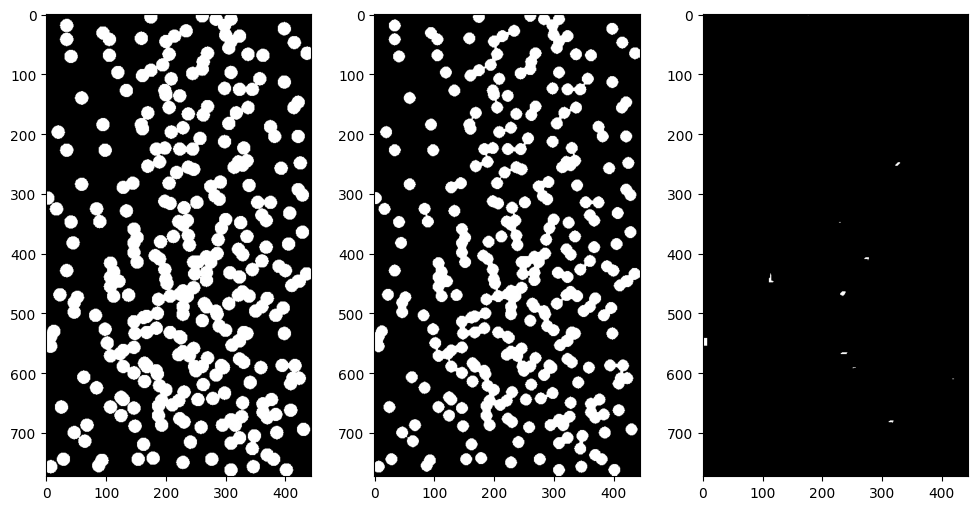

In [1]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('../photo/fig4.jpg')

# Structured element kernel, creating squares (3x3)
k1 = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
k2 = cv2.getStructuringElement(cv2.MORPH_RECT, (20,20))

# Apply erosion
erosion1 = cv2.erode(img, k1)
erosion2 = cv2.erode(img, k2)

#result
merged = np.hstack((img, erosion1))
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(erosion1)
plt.subplot(1,3,3)
plt.imshow(erosion2)
plt.show()
#cv2.imwrite('../data/erosion1.png',erosion1)

#cv2.waitKey(0)
#cv2.destroyAllWindows()

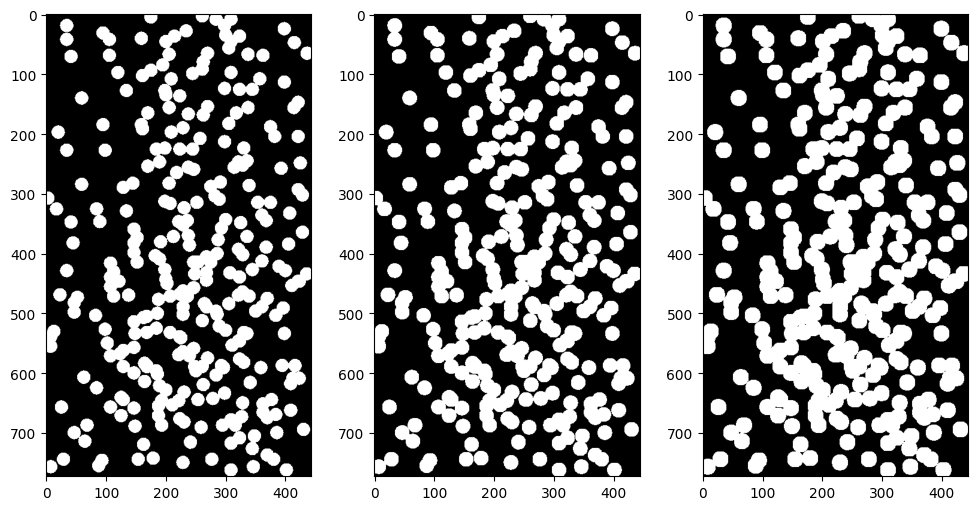

In [2]:
k1 = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
k2 = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

# Apply dilation
dilation1 = cv2.dilate(img, k1)
dilation2 = cv2.dilate(img, k2)

# result
merged = np.hstack((img, erosion1))
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(dilation1)
plt.subplot(1,3,3)
plt.imshow(dilation2)
plt.show()
#cv2.imwrite('../data/dilation1.png',dilation1)

#cv2.waitKey(0)
#cv2.destroyAllWindows()

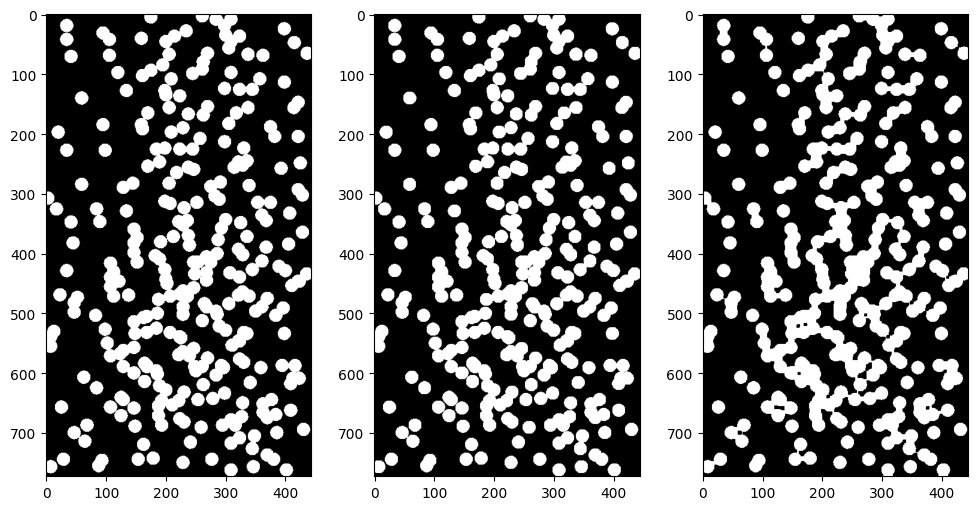

In [3]:
img1 = cv2.imread('../photo/fig4.jpg')
img2 = cv2.imread('../photo/fig4.jpg')    

# Structured element kernel, creating squares (5x5)
k = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
# Apply opening
opening = cv2.morphologyEx(img1, cv2.MORPH_OPEN, k)
# Apply closing
closing = cv2.morphologyEx(img2, cv2.MORPH_CLOSE, k)

# result
merged1 = np.hstack((img1, opening))
merged2 = np.hstack((img2, closing))
merged3 = np.vstack((merged1, merged2))
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(img1)
plt.subplot(1,3,2)
plt.imshow(opening)
plt.subplot(1,3,3)
plt.imshow(closing)
plt.show()
# cv2.imshow('opening, closing', merged3)
# cv2.waitKey(0)
#cv2.destroyAllWindows()

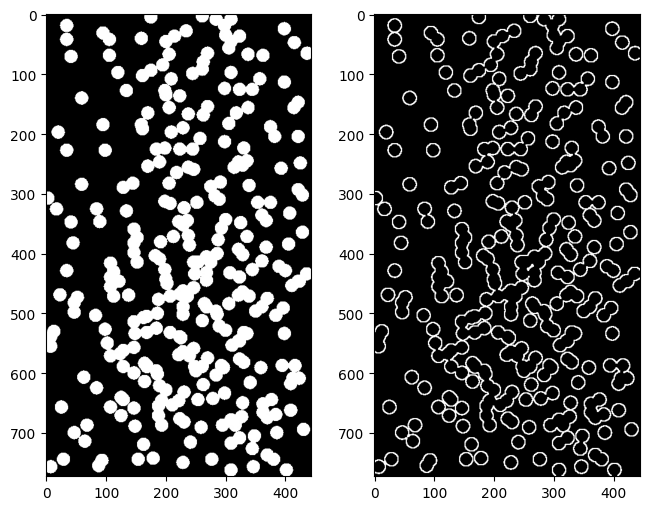

In [4]:

# Structured element kernel, creating squares (3x3)
k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
# Apply opening
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, k)

# result
merged = np.hstack((img, gradient))
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(img1)
plt.subplot(1,3,2)
plt.imshow(gradient)
plt.show()
# cv2.imshow('gradient', merged)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Now let's implement the algorithm.<br>


Original Image shape:  (773, 444, 3)
Gray scaled Image shape:  (773, 444)


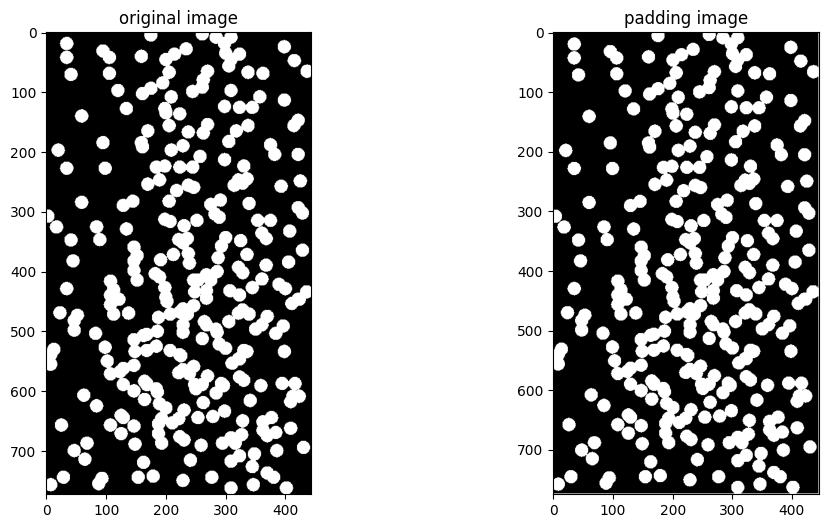

In [5]:
import cv2
import numpy as np
import matplotlib.pylab as plt
import matplotlib.image as mpimg

img = cv2.imread('../photo/fig4.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#take grayscale

R, G, B = img[:,:,0], img[:,:,1], img[:,:,2] #let's try apply the formula of gray scailing!
imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B

print("Original Image shape: ",img.shape)#image shape
print("Gray scaled Image shape: ",imgGray.shape) 

padding = (1,1)
npad = (padding,padding)
img_padding = np.pad(imgGray, npad, 'constant', constant_values=(255))#padding image
plt.figure(figsize=(12,6))
plt.subplot(1,2,1),plt.title("original image")
plt.imshow(imgGray, cmap='gray')
plt.subplot(1,2,2),plt.title("padding image")
plt.imshow(img_padding, cmap='gray')
plt.show()

The key to this algorithm is labeling.<br>
Because all elements are of the same size, they can be detected using labeling algorithms.

In [6]:
mat = np.array(img_padding, np.uint8)
print(mat)
print(mat[0][2])
print(mat[1][2])
cnt, labels = cv2.connectedComponents(mat)
print(cnt)
print(labels)

[[255 255 255 ... 255 255 255]
 [255   0   0 ...   0   0 255]
 [255   0   0 ...   0   0 255]
 ...
 [255   0   0 ...   0   0 255]
 [255   0   0 ...   0   0 255]
 [255 255 255 ... 255 255 255]]
255
0
128
[[1 1 1 ... 1 1 1]
 [1 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 1]
 ...
 [1 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 1]
 [1 1 1 ... 1 1 1]]


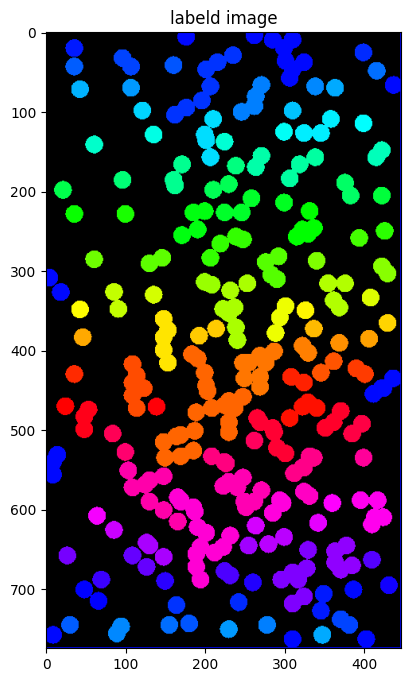

In [14]:
mat_threshold = cv2.threshold(mat, 127, 255, cv2.THRESH_BINARY)[1]  # ensure binary
ret_val,labels,stats,centroids = cv2.connectedComponentsWithStats(mat_threshold,8)

def imshow_components(labels):
    # Map component labels to hue val
    label_hue = np.uint8(200*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0
    plt.figure(figsize=(16,8)),plt.title('labeld image')
    plt.imshow(labeled_img,cmap='gray')
    plt.show()
    # cv2.waitKey()

imshow_components(labels)

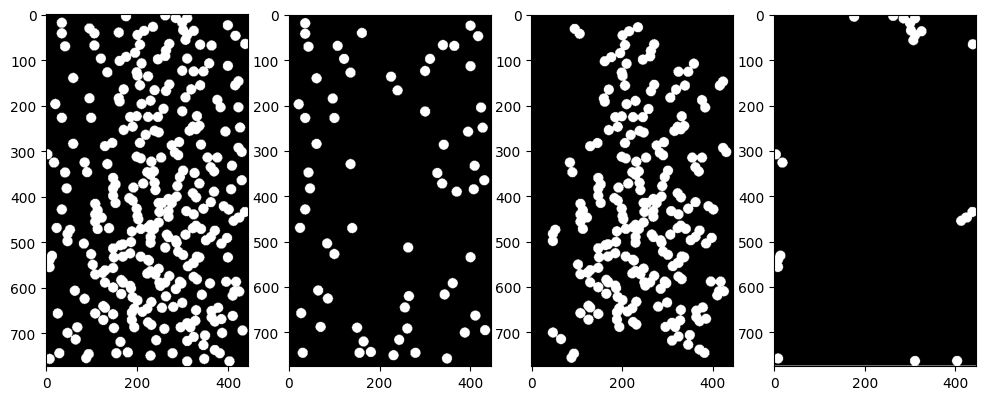

In [8]:
""" 
retval : detected object +1
lables : label map matrix
states: bounding box of each matrix
centroids: matrix including weight center of each object
"""
def extract(img,ret_val,labels,stats,min_area=300,max_area=400):
  output = np.zeros(img.shape, dtype="uint8")
  for i in range(1, ret_val):
    
        # Area of the component
      area = stats[i, cv2.CC_STAT_AREA]
      
      if (area > min_area) and (area < max_area):
          componentMask = (labels == i).astype("uint8") * 255
          output = cv2.bitwise_or(output, componentMask)
  return output
output1 = extract(mat_threshold,ret_val,labels,stats)
output2 = extract(mat_threshold,ret_val,labels,stats,400,8000)
output3 = extract(mat_threshold,ret_val,labels,stats,8000,100000)

plt.figure(figsize=(12,8))
plt.subplot(1,4,1)
plt.imshow(img,cmap='gray')
plt.subplot(1,4,2)
plt.imshow(output1,cmap='gray')
plt.subplot(1,4,3)
plt.imshow(output2,cmap='gray')
plt.subplot(1,4,4)
plt.imshow(output3,cmap='gray')
plt.show() 
# cv2.imshow("Image", img)
# cv2.imshow("Filtered Components", output)
# cv2.waitKey(0)